# **RBC Classification using CNN**

**Importing the required libraries and modules**

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [2]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

**Setting the required directories etc**

In [4]:
img_width = 150
img_height = 150

train_data_dir = '../input/rbc-augmented/rbc_augmented/training'
validation_data_dir = '../input/rbc-augmented/rbc_augmented/validation'
train_samples = 3000
validation_samples = 200
epochs = 90
batch_size = 10

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

**Creating the model**

In [5]:
from keras.layers import BatchNormalization

In [6]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [8]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0005), 
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [10]:
# augmentation configuration used for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3113 images belonging to 3 classes.


In [12]:
print(train_generator.class_indices)

{'circular': 0, 'elongated': 1, 'other': 2}


In [13]:
imgs, labels = next(train_generator)

In [ ]:
#input_shape = (150,150,3)

In [14]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

10
[1. 0. 0.]


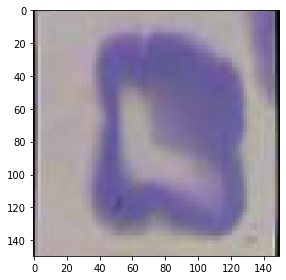

[1. 0. 0.]


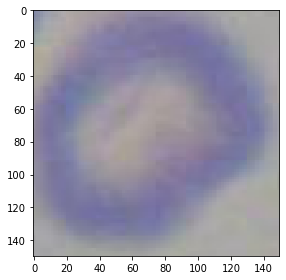

[0. 0. 1.]


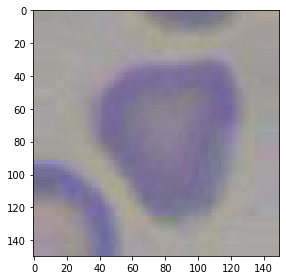

[1. 0. 0.]


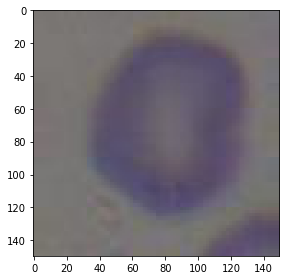

[1. 0. 0.]


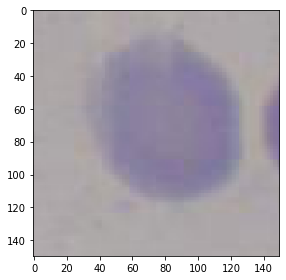

[1. 0. 0.]


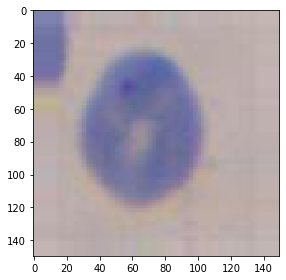

[0. 1. 0.]


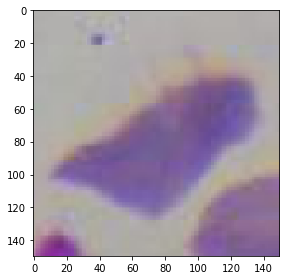

[1. 0. 0.]


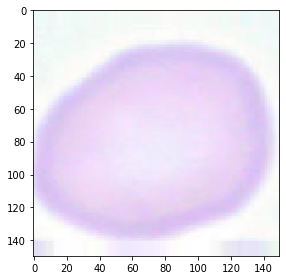

[1. 0. 0.]


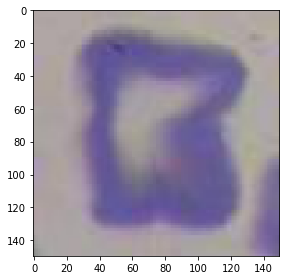

[0. 1. 0.]


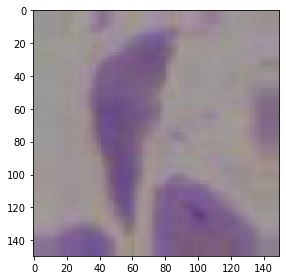

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [16]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 208 images belonging to 3 classes.


**Training the model**

In [17]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/90
300/300 [==============================] - 53s 175ms/step - loss: 1.0520 - accuracy: 0.4463 - val_loss: 0.6712 - val_accuracy: 0.6650
Epoch 2/90
300/300 [==============================] - 50s 166ms/step - loss: 0.7399 - accuracy: 0.6672 - val_loss: 0.5750 - val_accuracy: 0.7750
Epoch 3/90
300/300 [==============================] - 50s 165ms/step - loss: 0.6096 - accuracy: 0.7357 - val_loss: 0.5680 - val_accuracy: 0.7600
Epoch 4/90
300/300 [==============================] - 50s 167ms/step - loss: 0.5799 - accuracy: 0.7438 - val_loss: 0.5695 - val_accuracy: 0.7450
Epoch 5/90
300/300 [==============================] - 50s 167ms/step - loss: 0.5086 - accuracy: 0.7820 - val_loss: 0.4824 - val_accuracy: 0.8100
Epoch 6/90
300/300 [==============================] - 50s 167ms/step - loss: 0.4484 - accuracy: 0.8233 - val_loss: 0.4892 - val_accuracy: 0.8350
Epoch 7/90
300/300 [==============================] - 50s 166ms/step - loss: 0.4487 - accuracy: 0.8234 - val_loss: 0.5334 - val_ac

In [19]:
y = model.save_weights('RBC_one.h5') 

In [18]:
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

0.9692615866661072

**Final accuracy obtained**

In [20]:
z = history.history['accuracy'][-1]

In [21]:
print('accuracy obtained =',z*100)

accuracy obtained = 96.79251313209534


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


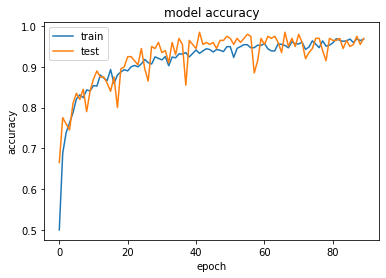

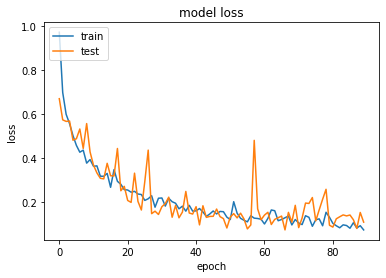

In [23]:
# list all data in history
print(history.history.keys())
# summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Prediction**

In [24]:
predict_dir_path='../input/rbc-augmented/rbc_augmented/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['Sickle cell_original_975363-5146712ef167c685ad4143e33b3c6c101.png_faadb99a-77fe-44d7-8971-8d02a39e3957.png', 'teste0226.jpg', '602706.jpg', 'testc0201.jpg', '15073012382_48e606d24b_c2.jpg', 'testo0222.jpg', '4.png', '0238MarionsHereditaryElliptocytosis1-Gloria-Kwon1oval.jpg', 'hbhb1.jpeg', 'cropped_blood_cells_original_12.jpg_192d60d8-691d-434d-ad78-ee7654050306.jpg', 'testo0220.jpg', '2611844781.jpg', 'testo0223.jpg', '602701oval.jpg', 'teste0227.jpg', 'testo0224.jpg', '2611844783.jpg', 'testo0221.jpg', '15073012382_48e606d24b_c3.jpg', 'cropped_blood_cells_original_4.png_065f900e-0361-4fd5-8b9a-de7de530a136.png', '602708 1.03.54 AM.jpg', '1200px-Sickle_cells4.jpg', 'testc0199.jpg', 'Sickle cell_original_Sickle_Cell_Blood_Smear2.jpg_c70ee2a8-79f1-4268-8392-37213b7ee216.jpg', 'cropped_blood_cells_original_11.jpg_817822d1-c6f2-446b-bd59-fbeb1fb74af0.jpg', 'Sickle cell_original_Blood-smear-of-a-patient-with-Sickle-Cell-Disease1.png_12f4e211-290d-4f5a-be09-5fd7aa13249d.png', '98381692.jp

In [25]:
# predicting images
from keras.preprocessing import image
circular_counter = 0 
elongated_counter  = 0
other_counter = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path +file , target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0]
    
    if classes == 0:
        print(file + ": " + 'circular')
        circular_counter += 1
    elif classes == 1:
        print(file + ": " + 'elongated')
        elongated_counter += 1
    else:
        print(file + ": " + 'other')
        other_counter += 1
print("Total Circular :",circular_counter)
print("Total Elongated :",elongated_counter)
print("Total Other :",other_counter)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Sickle cell_original_975363-5146712ef167c685ad4143e33b3c6c101.png_faadb99a-77fe-44d7-8971-8d02a39e3957.png: elongated
teste0226.jpg: elongated
602706.jpg: elongated
testc0201.jpg: circular
15073012382_48e606d24b_c2.jpg: elongated
testo0222.jpg: other
4.png: circular
0238MarionsHereditaryElliptocytosis1-Gloria-Kwon1oval.jpg: elongated
hbhb1.jpeg: elongated
cropped_blood_cells_original_12.jpg_192d60d8-691d-434d-ad78-ee7654050306.jpg: circular
testo0220.jpg: circular
2611844781.jpg: elongated
testo0223.jpg: other
602701oval.jpg: elongated
teste0227.jpg: elongated
testo0224.jpg: elongated
2611844783.jpg: elongated
testo0221.jpg: other
15073012382_48e606d24b_c3.jpg: elongated
cropped_blood_cells_original_4.png_065f900e-0361-4fd5-8b9a-de7de530a136.png: circular
602708 1.03.54 AM.jpg: elongated
1200px-Sickle_cells4.jpg: elongated
testc0199.jpg: circular
Sickle cell_original_Sickle_Cell_Blood_Smear2.jpg_c70ee2a8-79f1-4268-8392-37213b7ee216.jpg: elongated
cropped_blood_cells_original_11.jpg_817